### **Event Impact Analysis**

+ Change Point Analysis
+ Estimate Change Point using Baysian Model
+ Analyze the impact of Events on oil price

In [2]:
# 📊 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [3]:
# 🛠️ Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [4]:
from event_analysis import BrentOilEventAnalyzer

# Load the price data
print("📊 Loading Brent Oil Price data...")

price_data = pd.read_csv('../data/BrentOilPrices.csv')

# Convert 'Date' to datetime format
print("📅 Converting 'Date' to datetime format...")
price_data['Date'] = pd.to_datetime(price_data['Date'], format='mixed')

# Set 'Date' as the index
price_data.set_index('Date', inplace=True)
print("✅ Data loaded successfully! Here’s a glimpse of the data:")
print(price_data.head())  # Display the first few rows of the data

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


📊 Loading Brent Oil Price data...
📅 Converting 'Date' to datetime format...
✅ Data loaded successfully! Here’s a glimpse of the data:
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63


🔍 Initializing the Brent Oil Event Analyzer...
📈 Calculating CUSUM for the Brent Oil Prices...


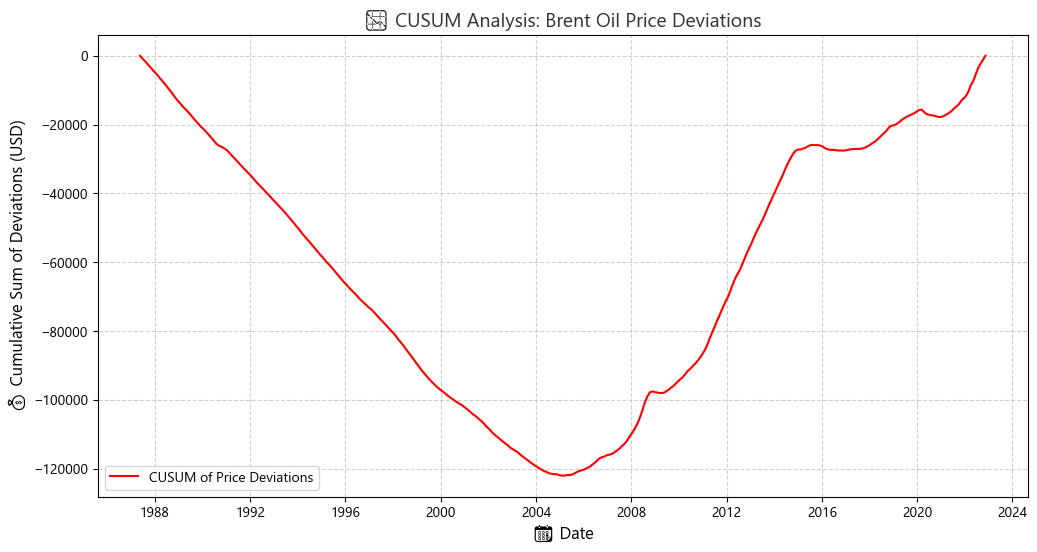

✅ CUSUM calculation completed successfully!


In [5]:
# Initialize the event analyzer
print("🔍 Initializing the Brent Oil Event Analyzer...")
analyzer = BrentOilEventAnalyzer(price_data)

# Calculate CUSUM
print("📈 Calculating CUSUM for the Brent Oil Prices...")
analyzer.calculate_cusum()
print("✅ CUSUM calculation completed successfully!")

Change Point Analysis with ruptures

🔍 Detecting change points in the Brent Oil Prices...
📌 Detected Change Point Years: [1999, 2004, 2010, 2014, 2021]


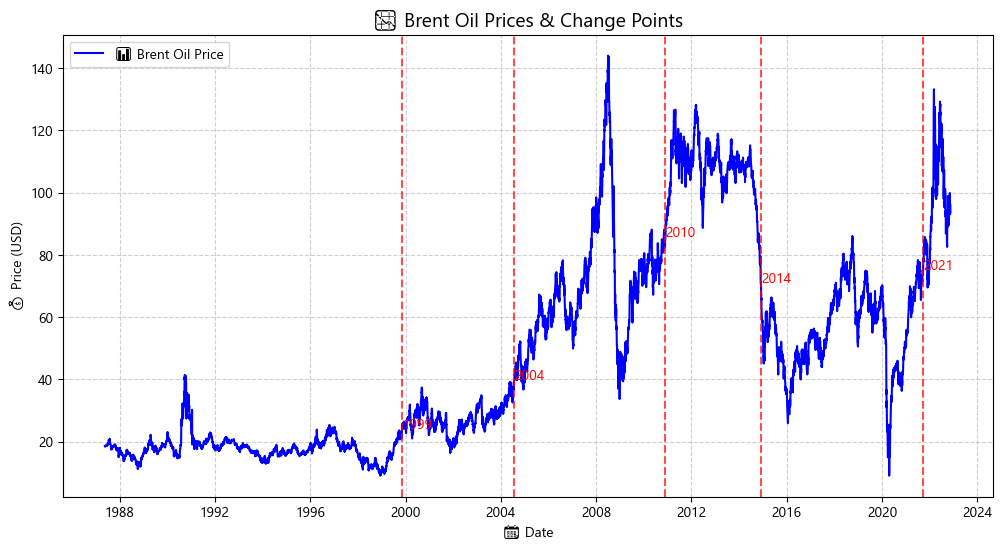

✅ Change point detection completed! Here are the results:
None


In [6]:
# Detect change points in the Brent Oil prices
print("🔍 Detecting change points in the Brent Oil Prices...")
change_points = analyzer.detect_change_point()

print("✅ Change point detection completed! Here are the results:")
print(change_points)

Estimate the change point using baysian model

🔍 Performing Bayesian Change Point Detection...


Only 20 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [change_point]
>NUTS: [mu1, mu2, sigma1, sigma2]


Output()

Sampling 2 chains for 10 tune and 20 draw iterations (20 + 40 draws total) took 1527 seconds.
The number of samples is too small to check convergence reliably.


<Figure size 1200x600 with 0 Axes>

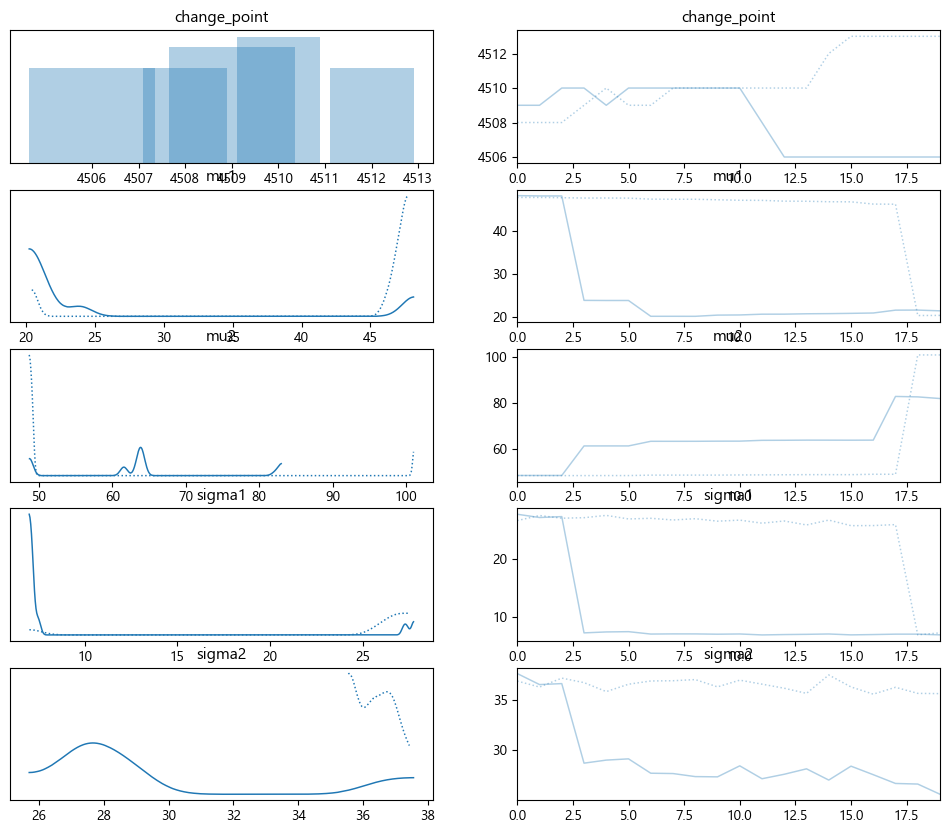

🕵️‍♂️ Estimated Change Point Date: 2005-02-09 00:00:00
✅ Bayesian Change Point Detection completed successfully!
📅 Detected Change Point Date(s): 2005-02-09 00:00:00


In [6]:
# Perform Bayesian change point detection
print("🔍 Performing Bayesian Change Point Detection...")
change_point_date = analyzer.bayesian_change_point_detection()
print("✅ Bayesian Change Point Detection completed successfully!")
print("📅 Detected Change Point Date(s):", change_point_date)

### 🛢️**Event Impact Analysis on Oil Prices**

1. 1999 Russian Financial Crisis
The 1998 default and ruble devaluation caused a sharp drop in oil prices, but recovery began in 1999 as demand surged, especially from Asia. 📈

2. 2005 Hurricane Katrina
This devastating hurricane struck in August, disrupting oil production and refining, leading to a significant spike in prices. 🌪️💰

3. 2010 Arab Spring
Protests across the Arab world sparked political instability in key oil-producing nations like Libya and Egypt, driving Brent oil prices higher. ✊🌍

4. 2014 Oil Price Crash
Mid-2014 saw a sharp decline in prices due to oversupply from the U.S. shale boom and OPEC's decision to maintain output. 📉

5. 2021 COVID-19 Pandemic Recovery
As economies reopened post-lockdowns, oil demand surged, significantly increasing prices, aided by OPEC+ production cuts. 🚀🌐

In [7]:
key_events = {
    "Russian Financial Crisis": "1999-08-17",
    "Hurricane Katrina": "2005-08-29",
    "Arab Spring": "2010-12-14",
    "U.S. shale oil boom": "2014-06-30",
    "Post-COVID-19 Recovery + OPEC+ Cuts": "2021-09-22",
}

### 📊 **Event Impact Analysis Results**

📈 **Event Impact DataFrame**

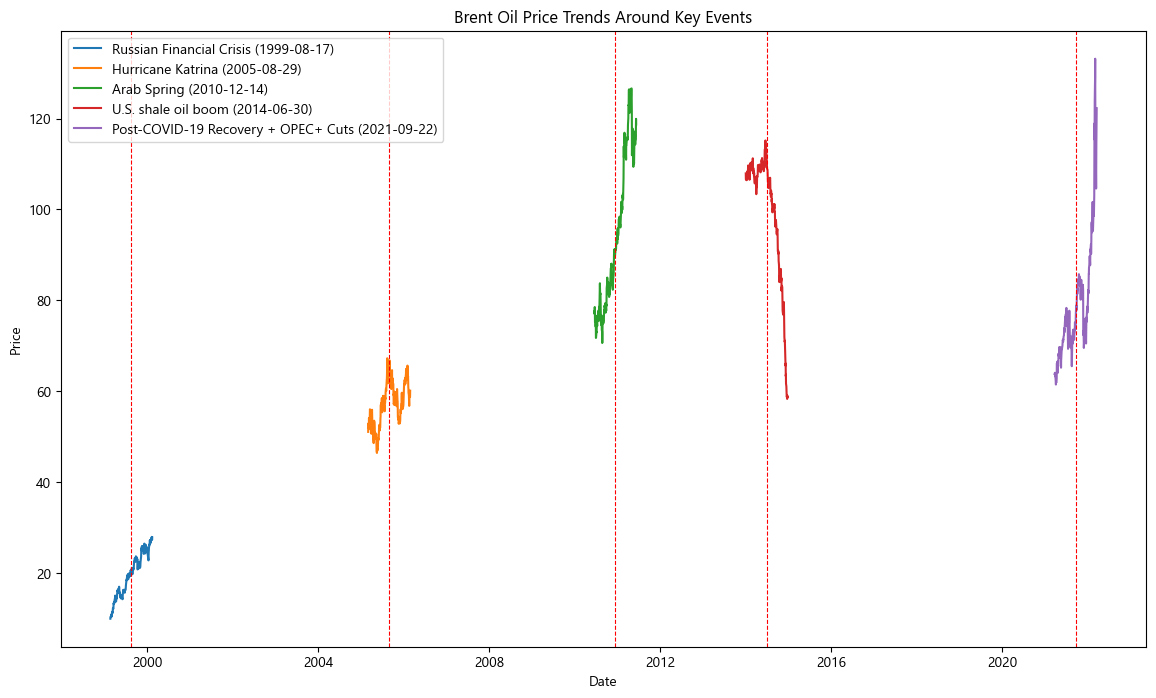

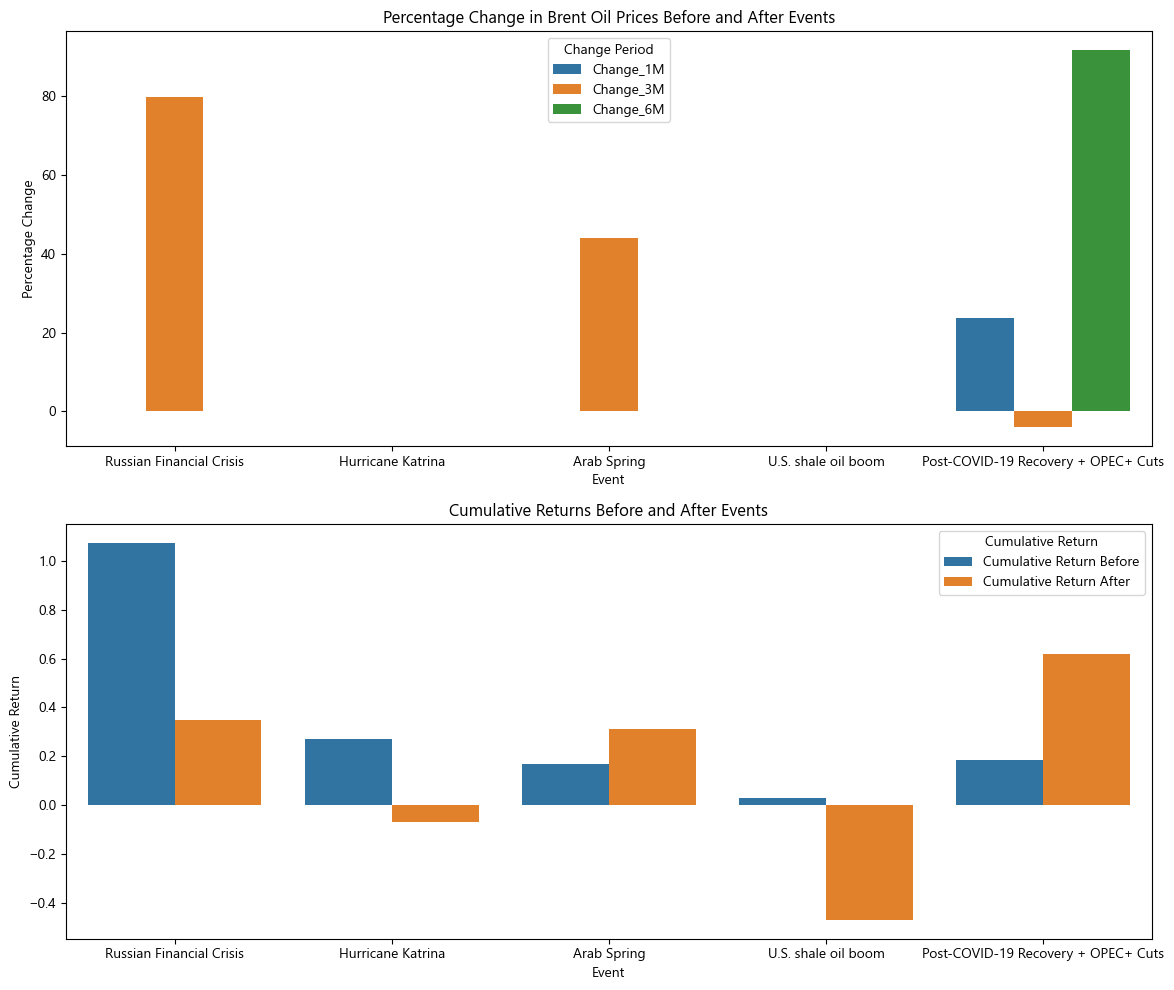

                                     t-statistic       p-value
Russian Financial Crisis              -25.682906  1.910203e-71
Hurricane Katrina                      -8.628759  6.872953e-16
Arab Spring                           -27.332285  1.677389e-76
U.S. shale oil boom                    14.154307  8.427530e-34
Post-COVID-19 Recovery + OPEC+ Cuts   -13.621948  5.968134e-32
Event Impact DataFrame:


,Event,Date,Change_1M,Change_3M,Change_6M,Cumulative Return Before,Cumulative Return After
0,Russian Financial Crisis,1999-08-17,NaN,79.819695,NaN,1.075529,0.349830
1,Hurricane Katrina,2005-08-29,NaN,NaN,NaN,0.268756,-0.071638
2,Arab Spring,2010-12-14,NaN,43.958705,NaN,0.169118,0.309831
3,U.S. shale oil boom,2014-06-30,NaN,NaN,NaN,0.028627,-0.471134
4,Post-COVID-19 Recovery + OPEC+ Cuts,2021-09-22,23.686116,-4.081633,91.767289,0.183942,0.619735


In [8]:
event_impact_df, t_test_df = analyzer.analyze_price_changes_around_events(key_events)

# Display results
print("Event Impact DataFrame:")
display(event_impact_df)

### **🔬 T-Test Results**

In [9]:
print("\nT-Test Results:")
display(t_test_df)


T-Test Results:


,t-statistic,p-value
Russian Financial Crisis,-25.682906,1.910203e-71
Hurricane Katrina,-8.628759,6.872953e-16
Arab Spring,-27.332285,1.677389e-76
U.S. shale oil boom,14.154307,8.427530e-34
Post-COVID-19 Recovery + OPEC+ Cuts,-13.621948,5.968134e-32
